In [1]:
import data_methods as dm
import matplotlib.pyplot as plt

from visualization_methods import VisualizationMethods as vm

dfs = dm.get_dataframes()
last_key = sorted(dfs.keys(), key=lambda x: x)[-1]
analysis = dm.get_metrics_analysis(
    dfs[last_key], 
    ['lcom', 'cbo', 'wmc', 'rfc'], 
    ['fanin', 'cbo', 'loc', 'rfc']
)

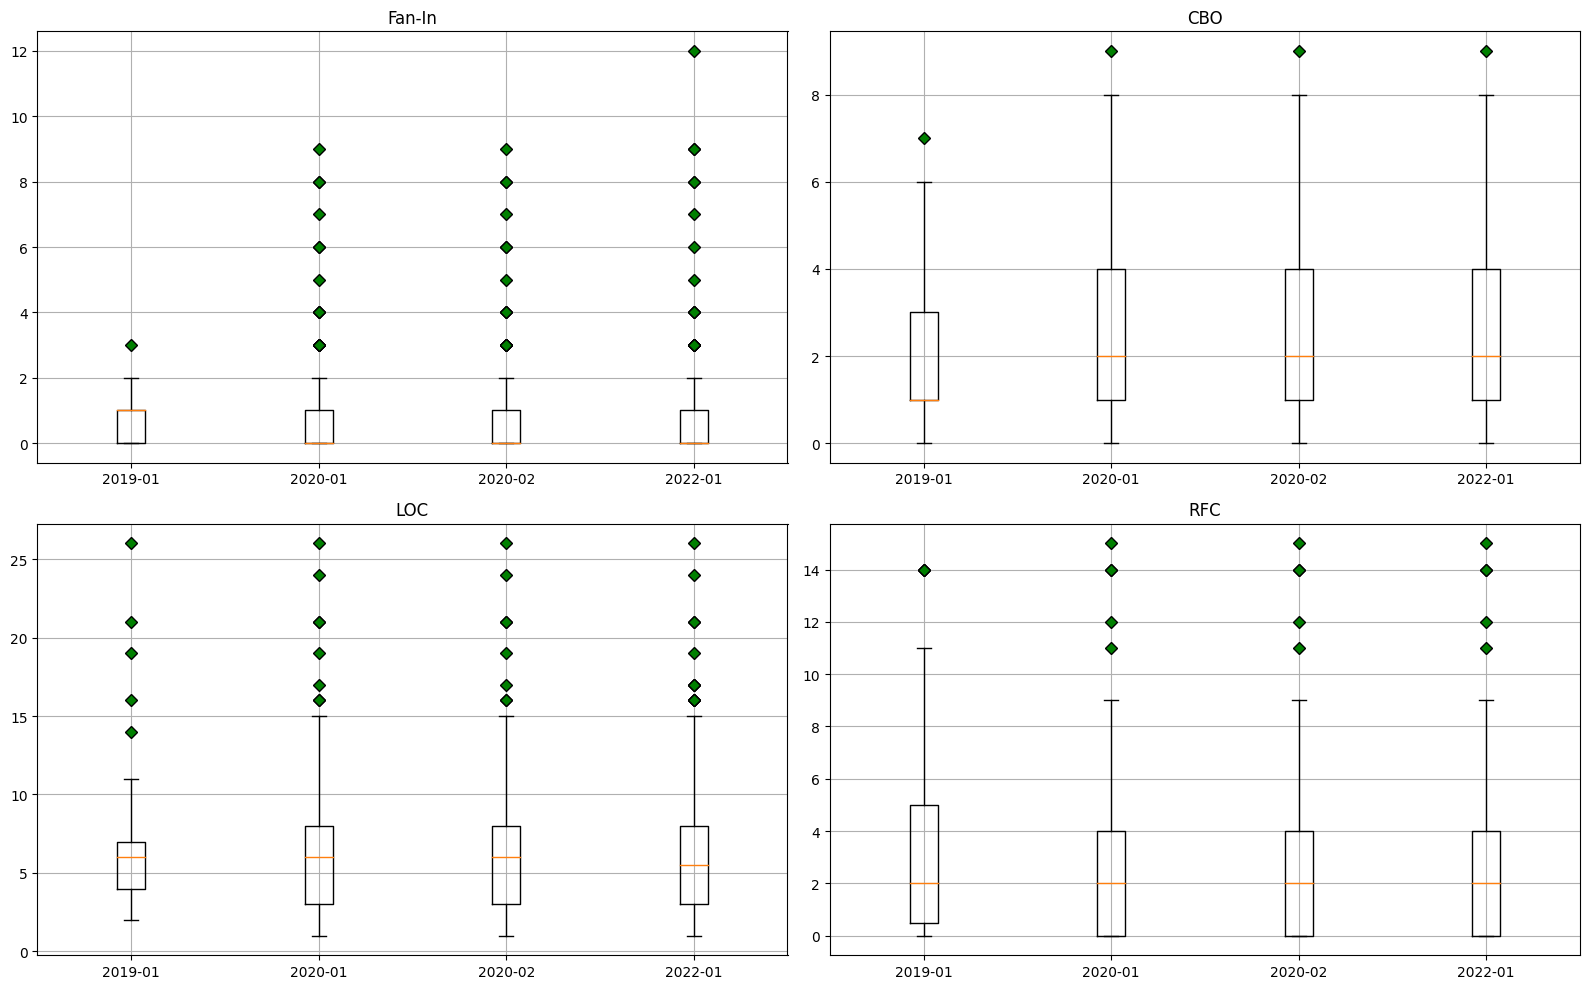

In [2]:
fig, rows = plt.subplots(2, 2, figsize=(16, 10))
fig.set_facecolor('white')

data_dict = {s:d['methods']['fanin'].values for s, d in dfs.items()}
vm.set_boxplots_by_ax(rows[0][0], data_dict, 'Fan-In')

data_dict = {s:d['methods']['cbo'].values for s, d in dfs.items()}
vm.set_boxplots_by_ax(rows[0][1], data_dict, 'CBO')

data_dict = {s:d['methods']['loc'].values for s, d in dfs.items()}
vm.set_boxplots_by_ax(rows[1][0], data_dict, 'LOC')

data_dict = {s:d['methods']['rfc'].values for s, d in dfs.items()}
vm.set_boxplots_by_ax(rows[1][1], data_dict, 'RFC')

plt.tight_layout()

In [3]:
top = 10
method_top_by_metric = dm.get_data_for_top_by_metric(analysis, 'method')
for metric, metric_content in method_top_by_metric.items():
    print('{} AVG: {} - {} STDEV: {}'.format(
        metric.upper(), metric_content['avg'], metric.upper(), metric_content['stdev']
    ))
    print('Top-{} methods with high {}:'.format(top, metric.upper()))
    for r in metric_content['records']:
        print('[{}] - {}'.format(r[0], r[1]))
    print('\n')

CBO AVG: 2.313953488372093 - CBO STDEV: 2.1553698646985446
Top-10 methods with high CBO:
[post/2[br.ufmg.engsoft.reprova.routes.api.Request,br.ufmg.engsoft.reprova.routes.api.Response]] - 9
[testQuestionSerialization_FineGrained/0] - 8
[testCreateWithoutStudentsFromBufferedReader/0] - 8
[testCreateWithStudents/0] - 8
[testCreateWithoutStudents/0] - 8
[test_insertion/0] - 7
[test_retrieval/0] - 7
[post/2[br.ufmg.engsoft.reprova.routes.api.Request,br.ufmg.engsoft.reprova.routes.api.Response]] - 7
[testCourseSerialization_FineGrained/0] - 7
[testQuestionSerialization_CoarseGrained/0] - 7


RFC AVG: 2.691860465116279 - RFC STDEV: 3.1277718912647434
Top-10 methods with high RFC:
[testQuestionSerialization_FineGrained/0] - 15
[list/2[java.lang.String,java.lang.Boolean]] - 14
[testQuestionSerialization_CoarseGrained/0] - 14
[post/2[br.ufmg.engsoft.reprova.routes.api.Request,br.ufmg.engsoft.reprova.routes.api.Response]] - 12
[post/2[br.ufmg.engsoft.reprova.routes.api.Request,br.ufmg.engsoft.re